In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [83]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
df.shape

(7043, 21)

### EDA

In [85]:
#dropping customerID column as it is not required
df.drop('customerID',axis = 'columns', inplace=True)

In [86]:
#checking type of data
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [87]:
#checking the numbers having white space
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [88]:
#coerce removes white spaces between number
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [89]:
# dropping rows having empty values TotalCharges
df1 = df[df.TotalCharges!=" "]
df1.shape

(7032, 20)

In [90]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\satya\anaconda3\envs\project\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [113]:
df1['TotalCharges'].dtypes

dtype('float64')

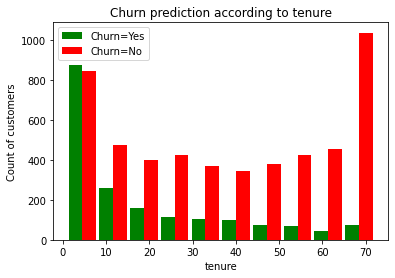

In [66]:
#Churn prediction according to tenure
tenure_churn_yes = df1.tenure[df1.Churn=='Yes']
tenure_churn_no = df1.tenure[df1.Churn=='No']

plt.xlabel('tenure')
plt.ylabel('Count of customers')
plt.title('Churn prediction according to tenure')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['red','green'],label=['Churn=Yes','Churn=No'],rwidth=0.90)
plt.legend()

Customers with more months of tenure are likely to stay

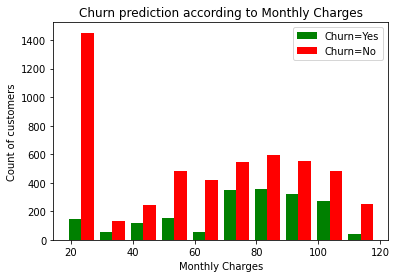

In [67]:
#Churn prediction according to Monthly Charges
MonthlyCharges_churn_yes = df1.MonthlyCharges[df1.Churn=='Yes']
MonthlyCharges_churn_no = df1.MonthlyCharges[df1.Churn=='No']

plt.xlabel('Monthly Charges')
plt.ylabel('Count of customers')
plt.title('Churn prediction according to Monthly Charges')
plt.hist([MonthlyCharges_churn_yes,MonthlyCharges_churn_no],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

Customers with highest and lowest monthly charge are most loyal

### Data Cleaning

In [92]:
#extracting unique values from each 'object' column
def unique_col_value(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [93]:
unique_col_value(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [94]:
# replacing 'No internet service','No phone service' with 'No'
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\satya\anaconda3\envs\project\lib\site-packages\pandas\core\frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [95]:
unique_col_value(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [96]:
# replacing all yes/no value with 1/0
yes_no_column = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                 'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_column:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\satya\anaconda3\envs\project\lib\site-packages\pandas\core\series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [98]:
for column in df1:
    print(f'{column} : {df1[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [99]:
# gender column to 1/0
df1.gender.replace({'Female':1,'Male':0},inplace=True)
df1.gender.unique()

array([1, 0], dtype=int64)

In [101]:
# one hot encoding on categorical column
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [102]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# scaling some columns using min max scalar
col_to_scale = ['MonthlyCharges','TotalCharges','tenure']
df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [106]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2218,1,0,1,1,0.985915,1,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
6712,0,0,1,1,0.380282,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
2292,1,0,1,1,0.746479,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0


### Model Creation

In [108]:
x = df2.drop('Churn',axis='columns')
y = df2.Churn

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=5)

In [112]:
x_train.shape, x_test.shape

((5625, 26), (1407, 26))

In [118]:
#20 hidden layer, 26 x_train column, 'relu' in case of hidden layer (for easy computing)
# 1 output layer, sigmoid in case of binary output 
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5123 - accuracy: 0.7367
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.7915
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.7973
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8011
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.8021
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8044
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8055
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4127 - accuracy: 0.8048
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8078
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4103 - accura

In [119]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4546 - accuracy: 0.7818


[0.4545634984970093, 0.7818052768707275]

In [120]:
yp = model.predict(x_test)
yp[:5]

array([[0.16079664],
       [0.46491784],
       [0.02976805],
       [0.7776959 ],
       [0.43901142]], dtype=float32)

In [121]:
# As y_predicted values is sigmoid (lies between 0 and 1), hence converting it to 0 and 1 to get binary value as y_test 
y_predict = []
for y in yp:
    if y<0.5:
        y_predict.append(0)
    else:
        y_predict.append(1)

In [124]:
y_predict[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [125]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

### checking accuracy

In [127]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.65      0.54      0.59       408

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.77      0.78      0.78      1407



From classification report, we observe that we obtained accuracy of 78%

Text(69.0, 0.5, 'Truth')

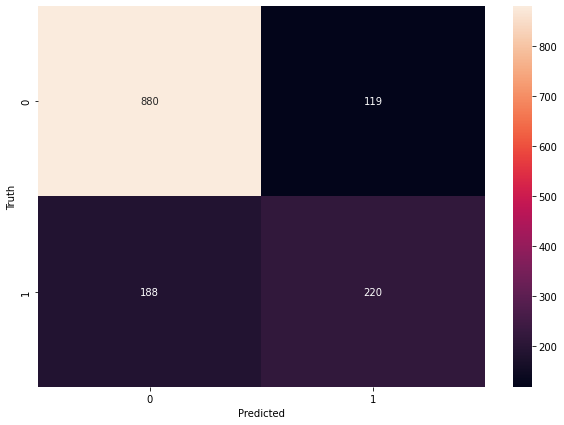

In [129]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [131]:
# calculating accuracy from confusion_matrix
round((880+220)/(880+119+220+188),2) #same as obtained from classification_report f1-score

0.78

### Precision for a class is number of currect output of that class divided by total output of that class

In [134]:
# precision for '0' class
round(880/(880+188),2)

0.82

In [135]:
# precision for '1' class
round(220/(119+220),2)

0.65

### Recall is the measure total correct prediction of a class (correct prediction of class/total value in that class)

In [136]:
# recall of '0' class
round(880/(880+119),2)

0.88

In [137]:
# recall of '1' class
round(220/(220+188),2)

0.54

### F1 score is the geometric mean of precision and recall. 2*(precision * recall)/(precision + recall)

In [138]:
# f1 score of '0' class
2*(0.82*0.88)/(0.82+0.88)

0.8489411764705882

In [139]:
# f1 score of '1' class
2*(0.65*0.54)/(0.65+0.54)

0.5899159663865547